# K_Means Clustering

## Import Libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

In [61]:
df = pd.read_csv("iris.csv")
df.head()
# Note that there is no label.

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [63]:
df.describe()
# Outlier values can deteriorate the clustering quality.
# We should be careful about outliers in clustering algorithms.

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


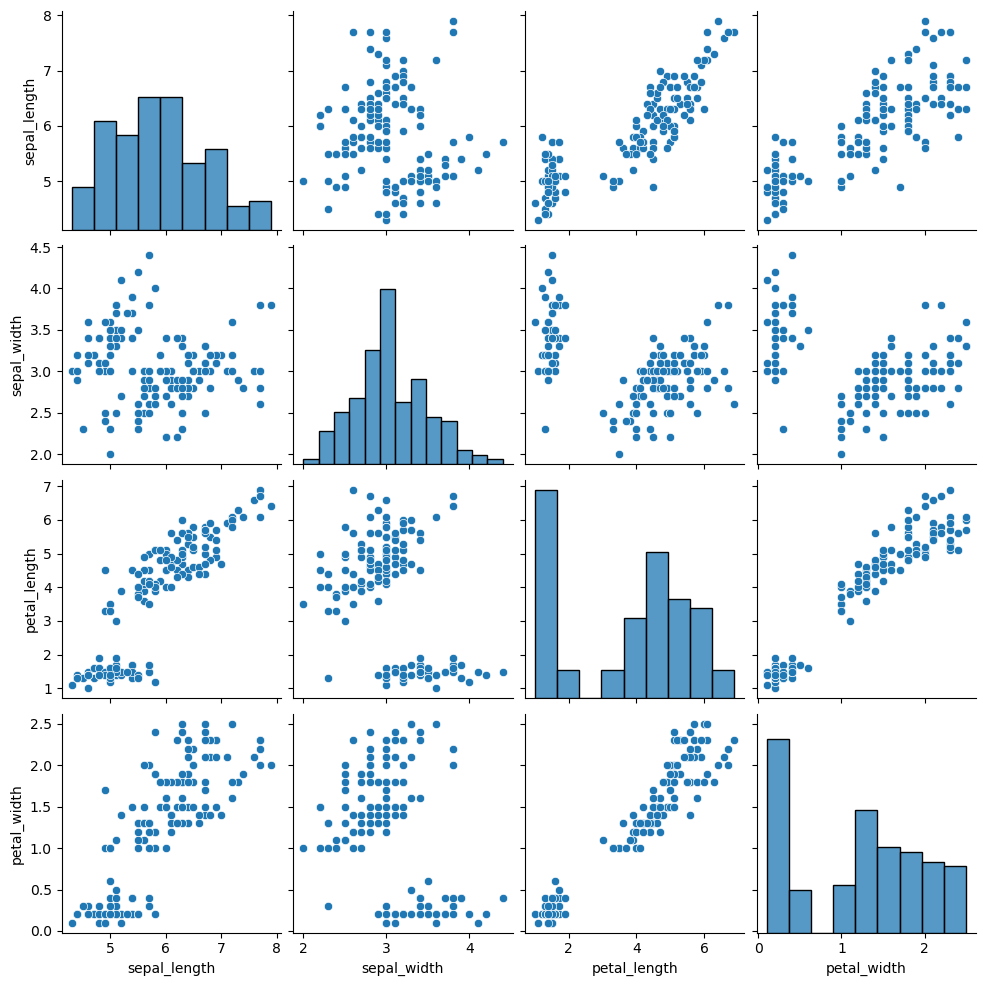

In [64]:
sns.pairplot(df)
plt.show()

# We can get an idea by looking at the scatterplot that "does our data tend to cluster or not?"
# If so, "how many clusters can I divide?" 
# We should keep in mind the ideal clustering logic, which we specify as minimal intra cluster distance 
# and maximal inter cluster distance, at every stage of clustering problems.

## Scaling Data

**The K-means algorithm definitely needs scaling**. However, if all our features are in the same/similar range, **there is no need to scale the data**. For these data, scaling may cause worse results in some cases. You should try data both with and without scale and continue with whichever one has good results.

from sklearn.preprocessing import StandardScaler

## K_Means Clustering

In [65]:
X = df.copy()
# There is no train-test split because it is unsupervised learning!

In [66]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [67]:
X.shape

(150, 4)

In [68]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=5, 
                       random_state=42)

# n_clusters=8 (default)
# n_init : we specify how many times to randomly assign centroids
# init='k-means++' : (assigns centroids randomly) With 'k-means++' we call the algorithm to 
# randomly assign centroids, but start by assigning centroids to places where data is dense.
# max_iter=300 --> in large data, there may be a need to increase this.
# random_state: so that our clusters are the same. Here we fix the random_state 
# so that a cluster that the sameness calls 1 does not say 0 the next time.

In [69]:
K_means_model.fit(X)
# fit--> algorithm detects patterns here (5 clusters)

KMeans(n_clusters=5, random_state=42)

In [70]:
K_means_model.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3])

In [71]:
K_means_model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3])

In [72]:
K_means_model.labels_
# After fit, we can directly see which observation is assigned to which cluster with the labels_ attribute.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3])

#### So far, we have done operations to get to know the k-means algorithm, now we will start the actual operations:

## Hopkins test

In [73]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]


# Normally this function is available in pyclustertend's hopkins library.
# However, we will use the function itself against any errors that may occur.

In [74]:
# hopkins : A statistical method that measures data clustering tendency.
# Less than 0.5 is prone to clustering.

In [75]:
X.shape

(150, 4)

In [76]:
hopkins(X, X.shape[0])

# We can say that hopkins 0 is data suiatable for clustering. 
# If the data were too large,
# we could also specify a sampling_size here instead of X.shape[0].
# The reason for different results each time it is run;
# is that it receives random observations from X in the background.

0.17194557243280484

In [77]:
hopkins(X, 50)

0.15890426541207137

# Choosing The Optimal Number of Clusters

## Elbow metod

In [78]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, 
                   random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

# Note that we start range from 2, if we start from 1, we will always see 2 as optimal k from elbow.
# inertia is the sum of the distances of the observations in the clusters from their centroids.
# Note that inertia focuses only intra cluster distance.
# The smaller the inertia, the better the clusters surrounded their centroids.

Text(0.5, 1.0, 'elbow method')

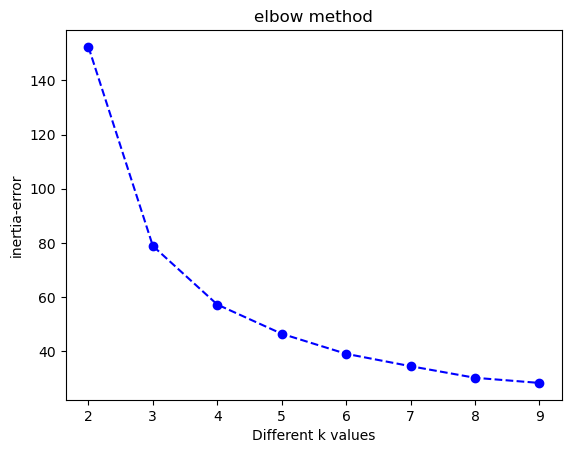

In [79]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [80]:
# According to the elbow method, the "first" point where the hard fall stops is optimal k.
# There may be 2-3 hard drops in some data.
# The point where inertia is the minimum means as many clusters as the number of observations,
# which is against the logic of clustering. You can observe this by doing # range(2,150).

In [81]:
ssd # sum of squared distance

[152.3479517603579,
 78.85144142614601,
 57.22847321428571,
 46.44618205128205,
 39.03998724608725,
 34.469495898838005,
 30.186555194805198,
 28.28937085137085]

In [82]:
-pd.Series(ssd).diff()

0          NaN
1    73.496510
2    21.622968
3    10.782291
4     7.406195
5     4.570491
6     4.282941
7     1.897184
dtype: float64

In [83]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X)
    distances = kmeanModel.transform(X) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

Text(0.5, 1.0, 'elbow method')

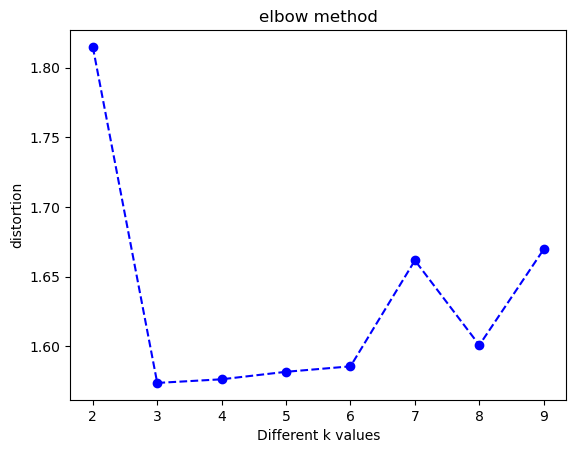

In [84]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion") 
plt.title("elbow method") 

In [85]:
# According to scatterplot;
# optimal k was like 2 , inertia suggested 3 as optimal k , distortion suggested 3 .
# But we know that elbow method works by considering inertia and distortion. In ideal clustering, 
# distance between clusters was also important for us. Therefore, we will get 
# a recommendation for optimal k by doing Silhouette analysis.

## Silhouette analysis

In [86]:
from sklearn.metrics import silhouette_score
# silhouette_score ; It is a metric that measures the quality of our clustering.
# When calculating, both inter cluster distance and intra cluster distance are taken into account.
# ranges -1 to 1, bad to good respectively.

In [87]:
K_means_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3])

In [88]:
silhouette_score(X, K_means_model.labels_)

0.48874888709310654

In [89]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, 
                    random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.6810461692117465
For n_clusters=3, the silhouette score is 0.5528190123564102
For n_clusters=4, the silhouette score is 0.49805050499728803
For n_clusters=5, the silhouette score is 0.48874888709310654
For n_clusters=6, the silhouette score is 0.36483400396700366
For n_clusters=7, the silhouette score is 0.34974816211612186
For n_clusters=8, the silhouette score is 0.3574536925852728


In [90]:
# n_clusters=2 on silhouette score high BUT;
# If I choose the number of clusters as 2, the inertia value is very high,
# so my clusters will spread over a large area.
# So we make a decision by comparing silhouette scores between n_clusters=3
# and n_clusters=4. The silhouette score calculated here is the average 
# of all observations (according to clusters)

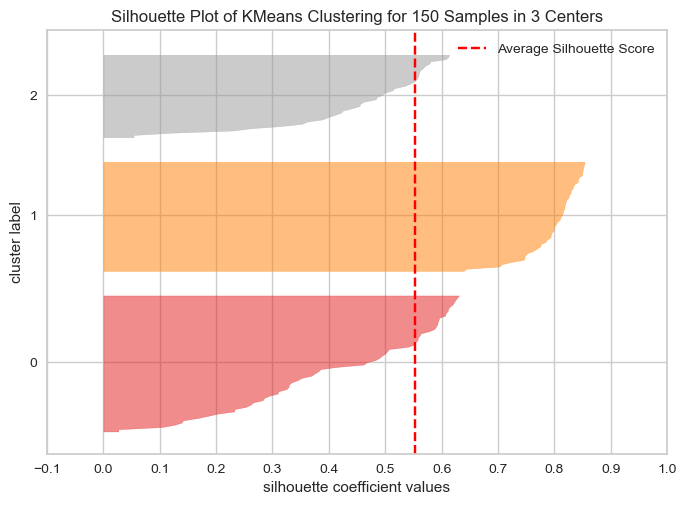

In [91]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, 
                random_state=42)          # we decided n_clusters=3!
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

# With this feature of yellowbrick, we can see the silhouette scores of each cluster separately.

In [92]:
model3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [93]:
visualizer.silhouette_samples_
# We can see the individual silhouette scores of the observations.

array([0.85295506, 0.81549476, 0.8293151 , 0.80501395, 0.8493016 ,
       0.74828037, 0.82165093, 0.85390505, 0.75215011, 0.825294  ,
       0.80310303, 0.83591262, 0.81056389, 0.74615046, 0.70259371,
       0.64377156, 0.77568391, 0.85101831, 0.70685782, 0.82030124,
       0.78418399, 0.82590584, 0.79297218, 0.7941134 , 0.77503635,
       0.79865509, 0.83346695, 0.84201773, 0.84364429, 0.81784646,
       0.81518962, 0.79899235, 0.76272528, 0.72224615, 0.82877171,
       0.83224831, 0.79415322, 0.84188954, 0.76856774, 0.85033231,
       0.84941579, 0.63900017, 0.78657771, 0.80023815, 0.74698726,
       0.80977534, 0.81340268, 0.81902059, 0.8182324 , 0.85209835,
       0.02672203, 0.38118643, 0.05340075, 0.59294381, 0.36885321,
       0.59221025, 0.28232583, 0.26525405, 0.34419223, 0.57829491,
       0.37478707, 0.58710354, 0.55107857, 0.48216686, 0.56310057,
       0.32459291, 0.55751057, 0.61072967, 0.46149897, 0.6115753 ,
       0.32909528, 0.58968904, 0.31046301, 0.49424779, 0.50004

In [94]:
labels_1 = (model3.labels_ == 1)

In [95]:
visualizer.silhouette_samples_[labels_1] # silhoutte scores of 1 classes

array([0.85295506, 0.81549476, 0.8293151 , 0.80501395, 0.8493016 ,
       0.74828037, 0.82165093, 0.85390505, 0.75215011, 0.825294  ,
       0.80310303, 0.83591262, 0.81056389, 0.74615046, 0.70259371,
       0.64377156, 0.77568391, 0.85101831, 0.70685782, 0.82030124,
       0.78418399, 0.82590584, 0.79297218, 0.7941134 , 0.77503635,
       0.79865509, 0.83346695, 0.84201773, 0.84364429, 0.81784646,
       0.81518962, 0.79899235, 0.76272528, 0.72224615, 0.82877171,
       0.83224831, 0.79415322, 0.84188954, 0.76856774, 0.85033231,
       0.84941579, 0.63900017, 0.78657771, 0.80023815, 0.74698726,
       0.80977534, 0.81340268, 0.81902059, 0.8182324 , 0.85209835])

In [96]:
mean_silhoutte_score_1 = visualizer.silhouette_samples_[labels_1].mean()
mean_silhoutte_score_1

0.7981404884286227

In [97]:
## Let's do same thing above for all classes: 
for i in range(3):
    label = (model3.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.41731992154093367
mean silhouette score for label 1    : 0.7981404884286227
mean silhouette score for label 2    : 0.45110506043401305
mean silhouette score for all labels : 0.5528190123564102


## Building the model based on the optimal number of clusters

####  We think of the optimal k as 3, and we will ask the expert, if he says 3, we will continue with 3. However, if the expert says ***"no, there are 4 types of plants here"***, we have to continue with 4.

![image.png](attachment:image.png)

In [98]:
model = KMeans(n_clusters = 3, random_state=42)
model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [99]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [100]:
clusters = model.labels_

In [101]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [102]:
X["predicted_clusters"] = clusters

In [103]:
X

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [104]:
labels = pd.read_csv("label.csv")            
labels 

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [105]:
labels.value_counts()

species   
setosa        50
versicolor    50
virginica     50
dtype: int64

In [106]:
X["labels"] = labels

In [107]:
X

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters,labels
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,0,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [108]:
ct = pd.crosstab(X.predicted_clusters, X.labels)
ct
# With pd.crosstab we will compare the predicted clusters and actual labels .

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,48,14
1,50,0,0
2,0,2,36


##### Since I have labels I can look at the adjusted_rand_score :

## Adjust Rand Score

In [109]:
from sklearn.metrics import adjusted_rand_score
# adjusted_rand_score is not accuracy, 
# adjusted_rand_score penalizes errors.
# In order to calculate the adjusted_rand_score, we somehow need to have 
# at least some of the actual labels at our disposal.

In [110]:
adjusted_rand_score(X.labels, X.predicted_clusters)
# the closer this score was to 1, predicted clusters are not smmilar and well separated.

0.7302382722834697

## Visualization Clusters

In [111]:
X_labels = X.labels.map({"versicolor":0, "setosa":1,"virginica":2})
X_labels
# I convert string types to numeric in order to draw scatter plots.
# I do these conversions according to crosstab.

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: labels, Length: 150, dtype: int64

In [112]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters,labels
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa


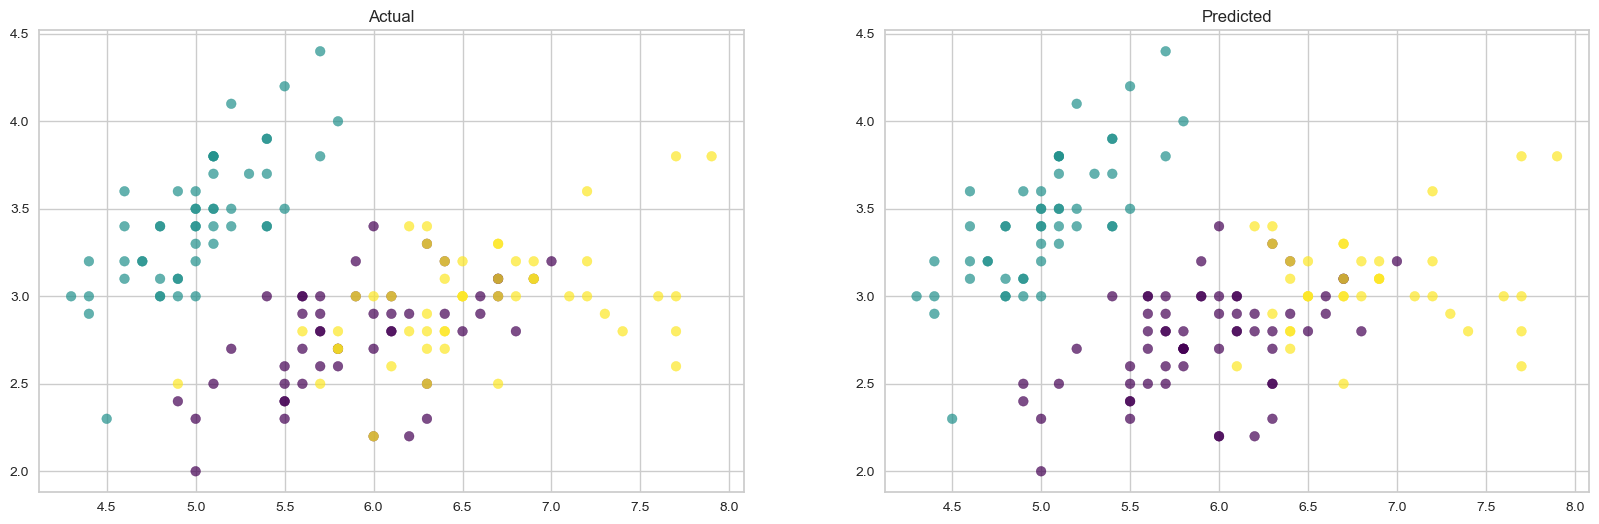

In [113]:
plt.figure(figsize = (20,6))

# we will randomly select 2 features and look at their distribution with each other
plt.subplot(121)
plt.scatter(X["sepal_length"], 
            X["sepal_width"],
            c=X_labels,  # c : coloring parameter
            cmap="viridis",
            alpha=0.7)
plt.title("Actual")                             

plt.subplot(122)
plt.scatter(X["sepal_length"],
            X["sepal_width"], 
            c=X.predicted_clusters,
            cmap="viridis",
            alpha=0.7)
plt.title("Predicted");

In [114]:
# Let's note that the places where there are errors are the places where the data is intricate.

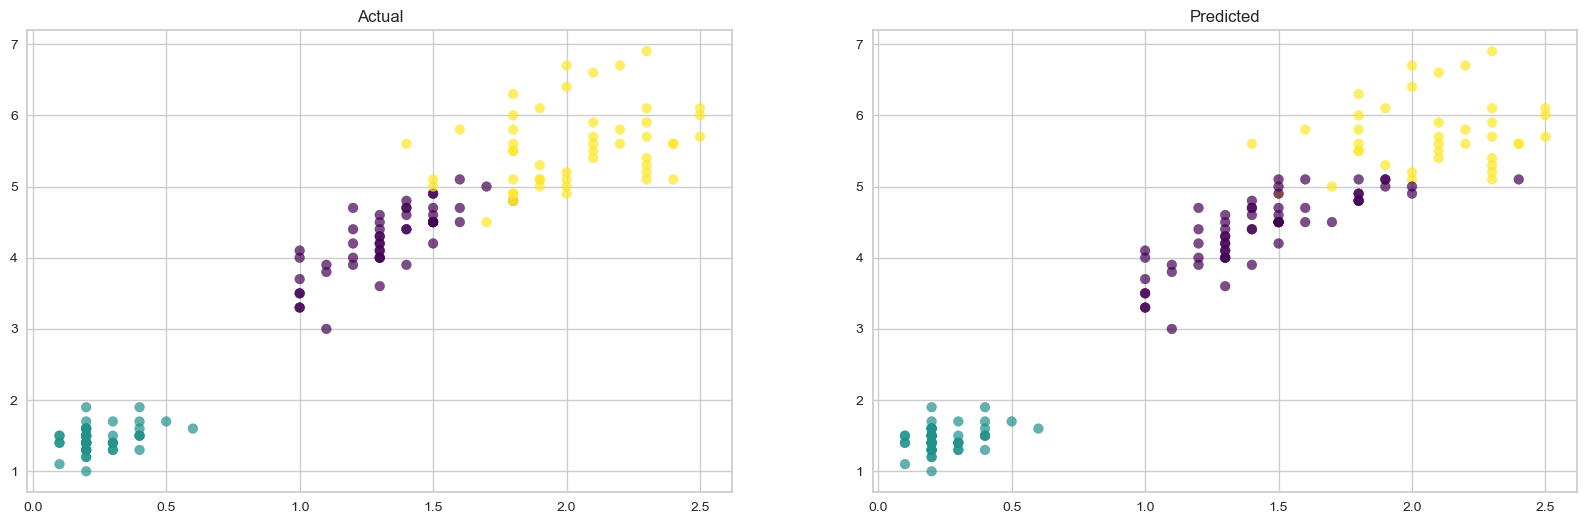

In [115]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X["petal_width"],
            X["petal_length"], 
            c=X_labels, 
            cmap="viridis",
            alpha=0.7)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X["petal_width"], 
            X["petal_length"],
            c=X.predicted_clusters,
            cmap="viridis",
            alpha=0.7)
plt.title("Predicted");

In [116]:
centers = model.cluster_centers_
centers
# coordinates of centorids:

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [117]:
centers[:,0] # centers of sepal_length feature

array([5.9016129, 5.006    , 6.85     ])

In [118]:
centers[:,1] # centers of sepal_width feature

array([2.7483871 , 3.428     , 3.07368421])

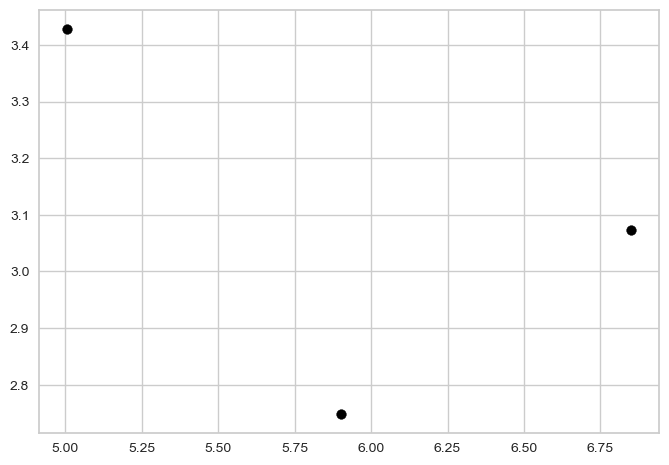

In [119]:
plt.scatter(centers[:,0], centers[:,1], c="black")

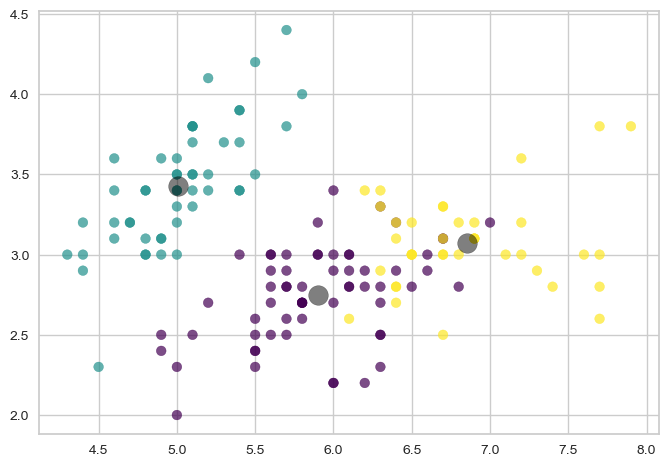

In [120]:
plt.scatter(X["sepal_length"],
            X["sepal_width"],
            c=X.predicted_clusters,
            cmap="viridis",
            alpha=0.7)  # X.predicted_clusters
plt.scatter(centers[:, 0],
            centers[:, 1], 
            c='black', 
            s=200, 
            alpha=0.5)

## Remodeling according to discriminating features

In [121]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters,labels
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa


In [122]:
X.iloc[:, :-1].head() 
# We will remove the labels and select the features that distinguish 
# the best over the clusters predicted by the algorithm!

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [123]:
clus_pred = X.iloc[:, :-1].groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters,0,1,2
sepal_length,5.901613,5.006,6.850000
sepal_width,2.748387,3.428,3.073684
petal_length,4.393548,1.462,5.742105
petal_width,1.433871,0.246,2.071053


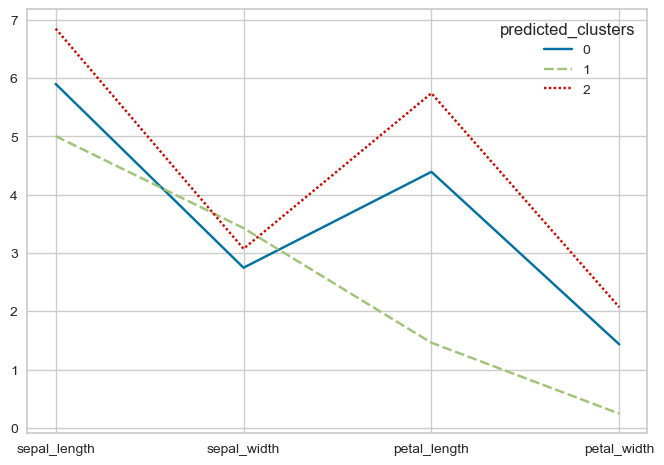

In [124]:
sns.lineplot(data = clus_pred);

# We plot this lineplot to see where the best separation is and in which features my data is intricate.

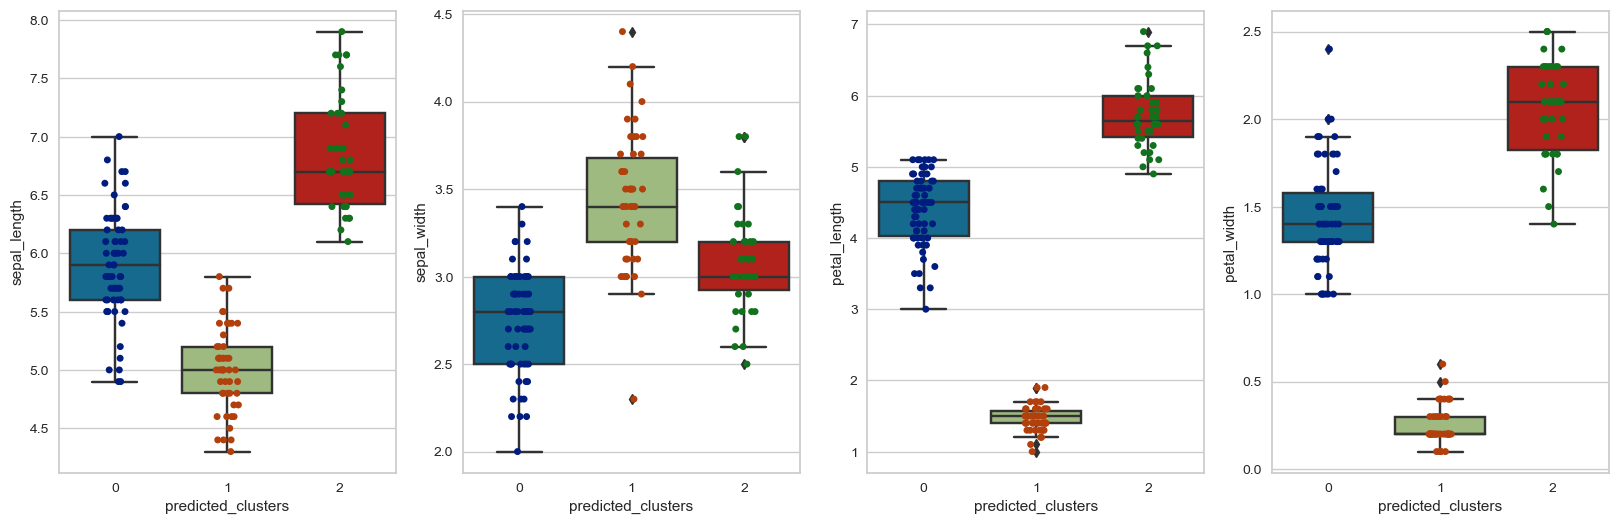

In [125]:
# I think I can separate clusters better with petal_length 
# and petal_width features (according to lineplot)
# let's observe this with boxplot:
plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "sepal_length", x = "predicted_clusters", data = X)
sns.stripplot(y = "sepal_length", x = "predicted_clusters", data = X, palette="dark")
#striplot ile cluster'larımızın yoğun olduğu ve seyrek olduğu yerleri görebiliyoruz.

plt.subplot(142)
sns.boxplot(y = "sepal_width", x = "predicted_clusters", data = X)
sns.stripplot(y = "sepal_width", x = "predicted_clusters", data = X, palette="dark")

plt.subplot(143)
sns.boxplot(y = "petal_length", x = "predicted_clusters", data = X)
sns.stripplot(y = "petal_length", x = "predicted_clusters", data = X, palette="dark")

plt.subplot(144)
sns.boxplot(y = "petal_width", x = "predicted_clusters", data = X)
sns.stripplot(y = "petal_width", x = "predicted_clusters", data = X, palette="dark");

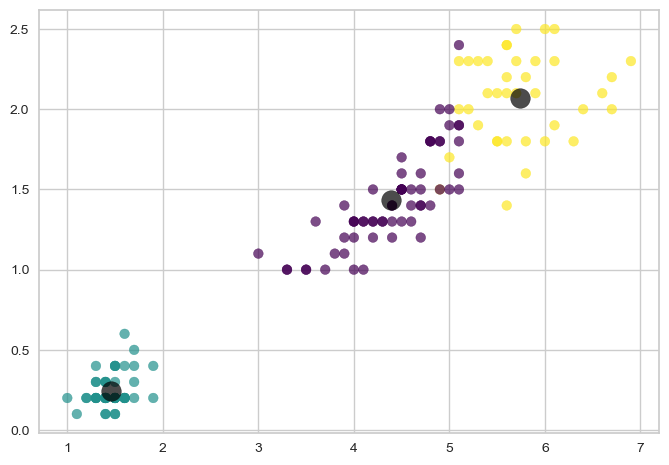

In [126]:
plt.scatter(X["petal_length"],
            X["petal_width"], 
            c=X.predicted_clusters,
            cmap="viridis",
            alpha =0.7)
plt.scatter(centers[:, 2],
            centers[:, 3], 
            c='black', 
            s=200, 
            alpha=0.7)

In [127]:
X2 = X.iloc[:, [2,3]]
X2

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


## Hopkins test

In [128]:
hopkins(X2, X2.shape[0])

0.1031663499868556

In [129]:
# With 4 features, my Hopkins test result was 0.16916864700671128, with 2 features more prone to clustering.

## Elbow metod

In [130]:
ssd = []

K = range(2,10)

for k in K:
    model3 = KMeans(n_clusters =k)
    model3.fit(X2)
    ssd.append(model3.inertia_)

Text(0.5, 1.0, 'elbow method')

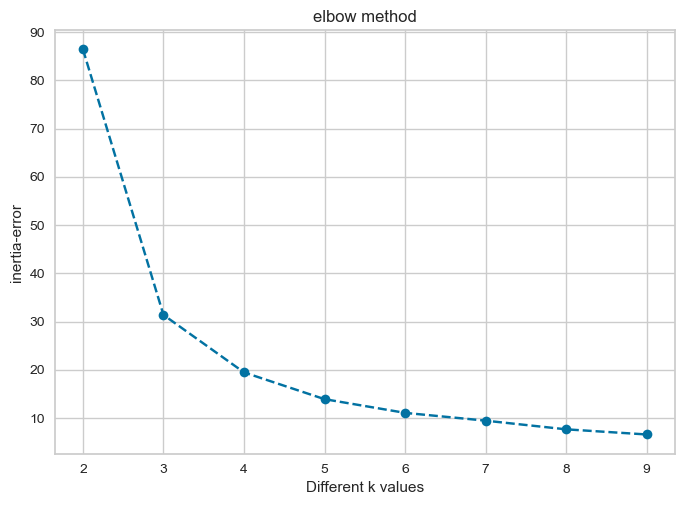

In [131]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [132]:
ssd

[86.39021984551395,
 31.371358974358976,
 19.465989010989013,
 13.91690875790876,
 11.07898617714316,
 9.462963249627338,
 7.667019523446296,
 6.599322556670384]

In [133]:
-pd.Series(ssd).diff()

0          NaN
1    55.018861
2    11.905370
3     5.549080
4     2.837923
5     1.616023
6     1.795944
7     1.067697
dtype: float64

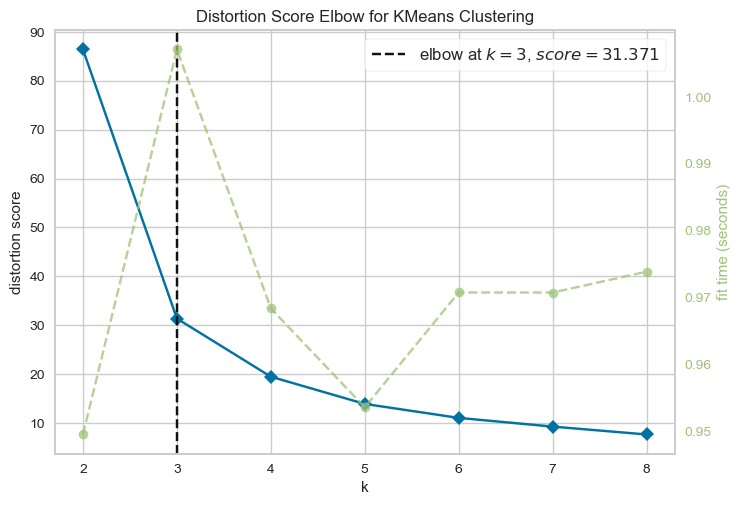

In [134]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show();

## Silhouette analysis

In [135]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.7653904101258123
For n_clusters=3, the silhouette score is 0.6604800083974887
For n_clusters=4, the silhouette score is 0.6127580794464402
For n_clusters=5, the silhouette score is 0.5883732712110276
For n_clusters=6, the silhouette score is 0.5767097832601947
For n_clusters=7, the silhouette score is 0.5640984340524553
For n_clusters=8, the silhouette score is 0.5902255624998716


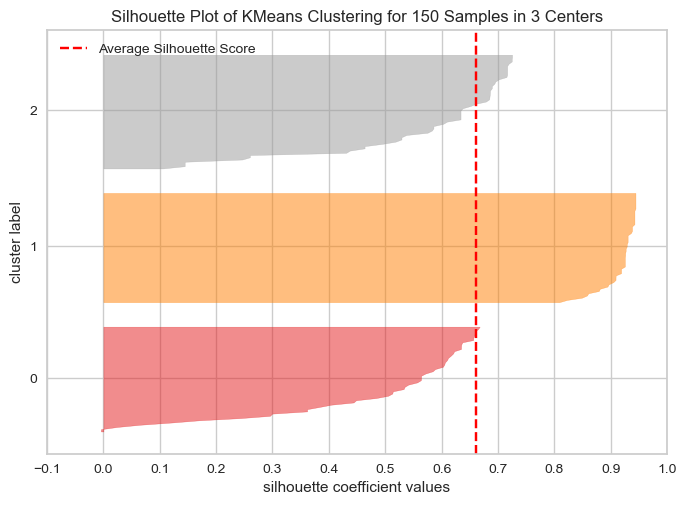

In [136]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

In [137]:
for i in range(model3.n_clusters):
    label = (model3.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.4850074375102458
mean silhouette score for label 1    : 0.9187718817796753
mean silhouette score for label 2    : 0.5740971186566872
mean silhouette score for all labels : 0.6604800083974887


## Building the model based on the optimal number of clusters

In [138]:
final_model = KMeans(n_clusters=3,
                     random_state=42)
final_model.fit_predict(X2)
# We only use 2 features we decided.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [139]:
#final_model.labels_

In [140]:
X2["labels"] = labels

In [141]:
X2["predicted_clusters"] = final_model.labels_

In [142]:
X2.head()

,petal_length,petal_width,labels,predicted_clusters
0,1.4,0.2,setosa,1
1,1.4,0.2,setosa,1
2,1.3,0.2,setosa,1
3,1.5,0.2,setosa,1
4,1.4,0.2,setosa,1


## Adjust Rand Score

In [143]:
adjusted_rand_score(X2.labels, X2.predicted_clusters)
# adjusted_rand_score has also increased (0.73 before).

0.8856970310281228

## Compare results

In [144]:
# ct for 2 features
pd.crosstab(X2.predicted_clusters, X2.labels)

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,2,46
1,50,0,0
2,0,48,4


In [145]:
# ct for all features
ct

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,48,14
1,50,0,0
2,0,2,36


## Prediction cluster of new data

In [146]:
new_data = [[1.7, 0.2]]

In [147]:
final_model.predict(new_data)

array([1])